# 1. Unsupervised Learning

In [1]:
%matplotlib inline
import scipy
import scipy.stats
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1. Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. Since you generated the data, you already know which sample comes from which class.
  Run the cell in the IPython notebook to generate the data.

In [2]:
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

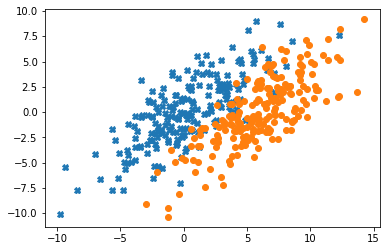

In [3]:
plt.plot(x_class1[:,0],x_class1[:,1],'X') # first class, x shape
plt.plot(x_class2[:,0],x_class2[:,1],'o') # second class, circle shape
plt.show()

## 2. Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost vs. the number of iterations. Report your misclassification error.

In [4]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])
    return J

In [5]:
# TODO: K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    # Fill this in:
    N, D = data.shape
    K = Mu.shape[1]
    r = np.zeros((N,K))
    for k in range(K):
        r[:, k] = np.linalg.norm(data-Mu[:,k],ord=2,axis=1)**2
    arg_min = np.argmin(r,axis=1) # argmax/argmin along dimension 1
    R_new = np.zeros((N,K)) # Set to zeros/ones with shape (N, K)
    R_new[np.arange(0,N,1), arg_min] = 1 # Assign to 1
    return R_new

In [6]:
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = np.zeros((D, K))
    for i in range(N):
        Mu_new[:, np.argmax(R[i])] += data[i]
    Mu_new = Mu_new / np.sum(R, axis=0)
    # np.sum(R,axis=0) returns
    # an 1*k vector, number of datapoitns assigned to each class
    return Mu_new

In [7]:
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)
cost_plt=[]

for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    #print(it, cost(data, R, Mu))
    cost_plt.append(cost(data,R,Mu))

class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

Missclassification rate of K-mean clustering is  20.5 %


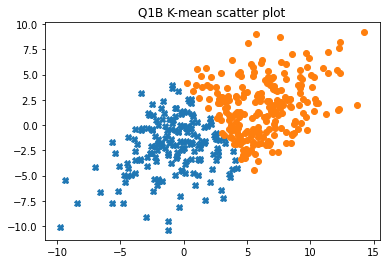

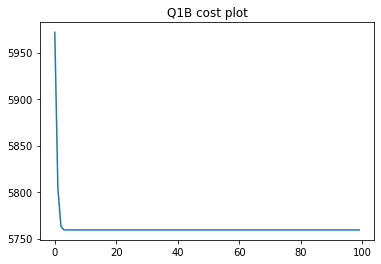

In [8]:
# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape
correct_class_1 = num_samples // 2 - sum(labels[class_1])
correct_class_2 = sum(labels[class_2])
num_correct = correct_class_1 + correct_class_2
print('Missclassification rate of K-mean clustering is ', round(1-num_correct/400,3)*100, '%')
x_class1_new = data[class_1]
x_class2_new = data[class_2]
plt.plot(x_class1_new[:, 0], x_class1_new[:, 1], 'X')  # first class, x shape
plt.plot(x_class2_new[:, 0], x_class2_new[:, 1], 'o')  # second class, circle shape
plt.title("Q1B K-mean scatter plot")
plt.show()
plt.plot(np.arange(0,max_iter,1),cost_plt)
plt.title("Q1B cost plot")
plt.show()

## 3. Implement EM algorithm for Gaussian mixtures
Next, implement the EM algorithm for Gaussian mixtures.
  Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  Identify the correct arguments, and the order to run them.
  Initialize the algorithm with means as in Qs 2.1 k-means initialization, covariances with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$.

  In addition to the update equations in the lecture, for the M (Maximization) step, you also need to use this following equation to update the covariance $\Sigma_k$:
$$\hat{\mathbf{\Sigma}_k} = \frac{1}{N_k} \sum^N_{n=1} r_k^{(n)}(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})^{\top}$$
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [9]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [10]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    L, T = 0., 0.
    for n in range(N):
        T = 0
        for k in range(K):
            #though we are a given normal_density function, I found there is a function with same functionality from scipy
            T += Pi[k]*scipy.stats.multivariate_normal(mean=Mu[:,k],cov=Sigma[k]).pdf(data[n]) # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients
        L += np.log(T)
    return L

In [11]:
# TODO: Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of mixtures
    Gamma = np.zeros((N, K))  # zeros of shape (N,K), matrix of responsibilities
    for n in range(N):
        normal = np.zeros((2))
        for k in range(K):
            normal[k] = normal_density(data[n],Mu[:,k],Sigma[k])
            Gamma[n, k] = Pi[k] * normal_density(data[n],Mu[:,k],Sigma[k])
        Gamma[n, :] /= np.sum(Pi * normal) # Normalize by sum across second dimension (mixtures)

    return Gamma

In [12]:
# TODO: Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    # Fill this in:
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1]  # number of mixtures
    Nk = np.sum(Gamma, axis=0)  # Sum along first axis
    Mu = np.matmul(data.T, Gamma)/Nk
    Sigma = np.zeros((K, D, D))

    for k in range(K):
        count = np.zeros((D,D))
        for n in range(N):
            residual = data[n]-Mu[:,k]
            residual = np.reshape(residual,(D,-1))
            residual_t = np.reshape(residual,(-1,D))
            squared_residual = np.matmul(residual,residual_t)
            count += Gamma[n,k]*squared_residual
        Sigma[k] = count/Nk[k]
    Sigma=Sigma
    Pi = Nk / N
    return Mu, Sigma, Pi

In [13]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200
log_likelihood_plt=[]

for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging
    log_likelihood_plt.append(-log_likelihood(data, Mu, Sigma, Pi))

class_1 = np.where(Gamma[:, 0] >= .5)
class_2 = np.where(Gamma[:, 1] >= .5)

Missclassification rate of EM algorithm is  4.5 %


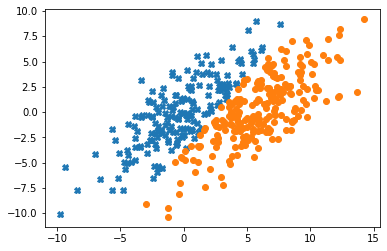

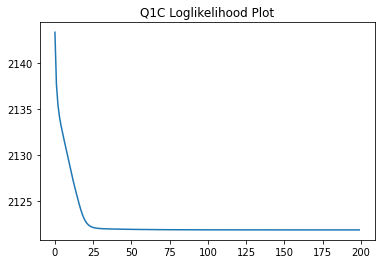

In [14]:
# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape
correct_class_1 = num_samples // 2 - sum(labels[class_1])
correct_class_2 = sum(labels[class_2])
num_correct = correct_class_1 + correct_class_2
print('Missclassification rate of EM algorithm is ', round(1-num_correct/400,3)*100, '%')
x_class1_new = data[class_1]
x_class2_new = data[class_2]
plt.plot(x_class1_new[:, 0], x_class1_new[:, 1], 'X')  # first class, x shape
plt.plot(x_class2_new[:, 0], x_class2_new[:, 1], 'o')  # second class, circle shape
plt.show()
plt.plot(np.arange(0,max_iter,1),log_likelihood_plt)
plt.title("Q1C Loglikelihood Plot")
plt.show()

## 4. Comment on findings + additional experiments

Comment on the results:

* Compare the performance of k-Means and EM based on the resulting cluster assignments.
* Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method?
* Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data?
 


**TODO: Your written answer here**


###########################Start Experiement No. 1 #######################################
Missclassification rate of 0 th K-mean clustering is  24.5 %
Missclassification rate of 0 th EM algorithm is  12.0 %
###########################Start Experiement No. 2 #######################################
Missclassification rate of 1 th K-mean clustering is  33.0 %
Missclassification rate of 1 th EM algorithm is  15.0 %
###########################Start Experiement No. 3 #######################################
Missclassification rate of 2 th K-mean clustering is  17.5 %
Missclassification rate of 2 th EM algorithm is  32.5 %
###########################Start Experiement No. 4 #######################################
Missclassification rate of 3 th K-mean clustering is  22.5 %
Missclassification rate of 3 th EM algorithm is  38.0 %
###########################Start Experiement No. 5 #######################################
Missclassification rate of 4 th K-mean clustering is  24.0 %
Missclassificati

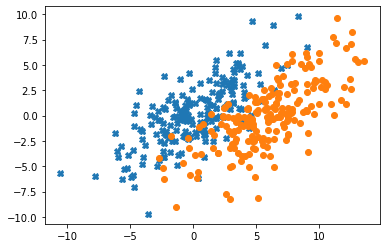

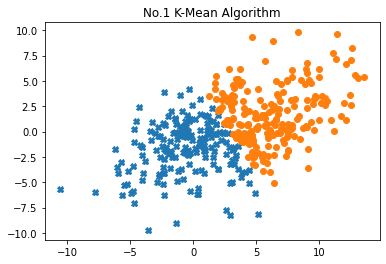

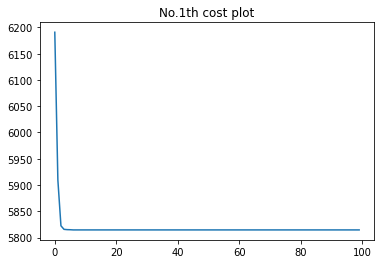

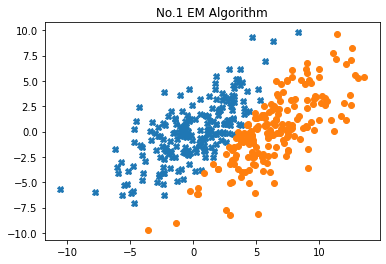

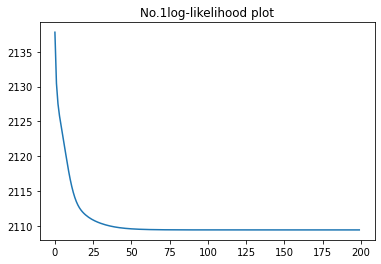

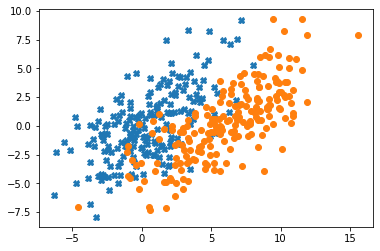

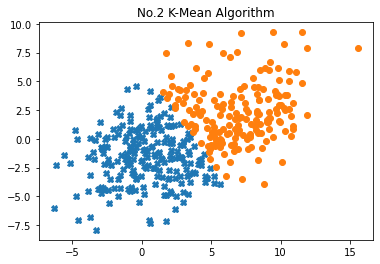

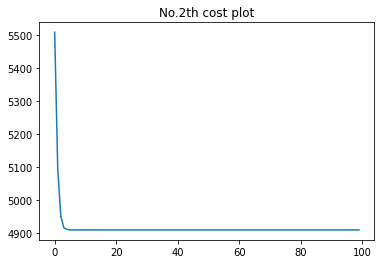

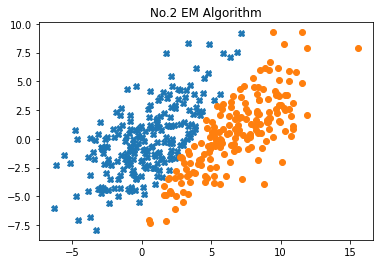

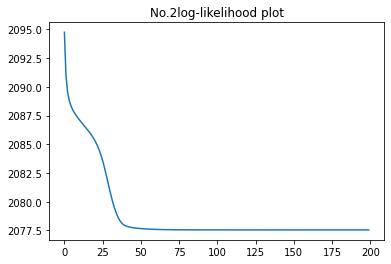

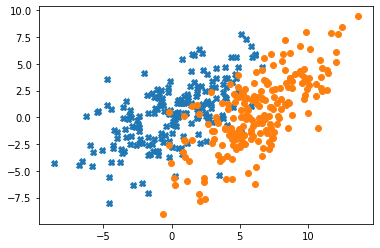

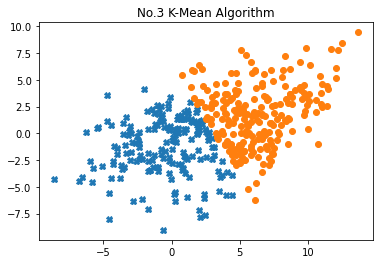

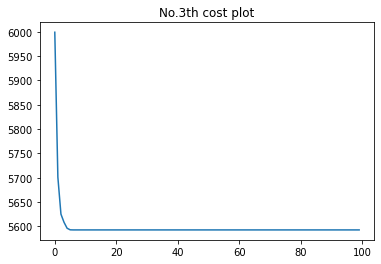

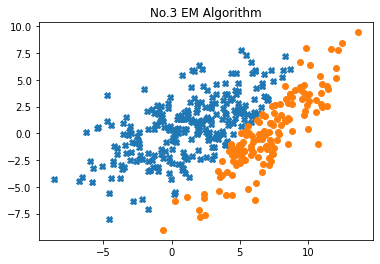

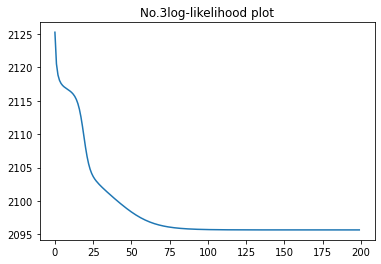

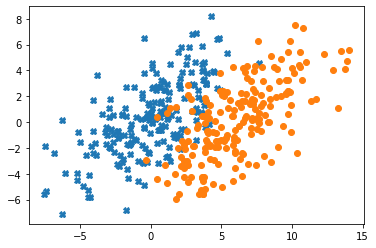

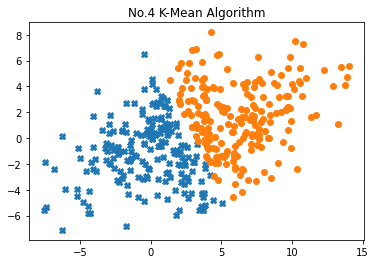

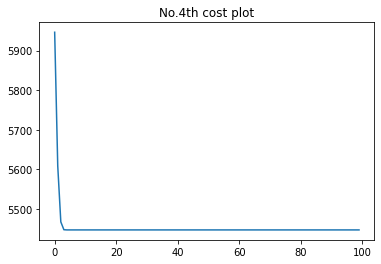

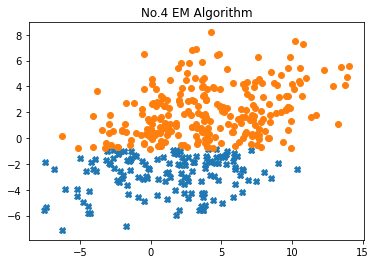

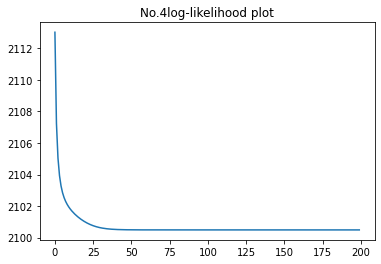

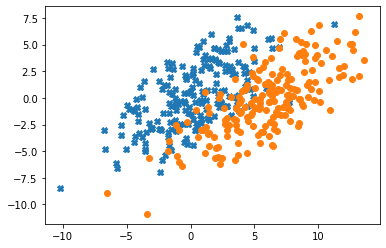

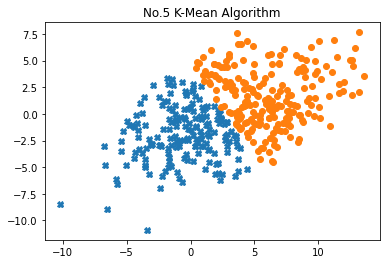

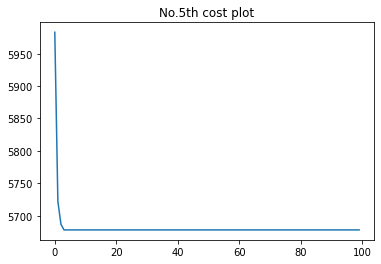

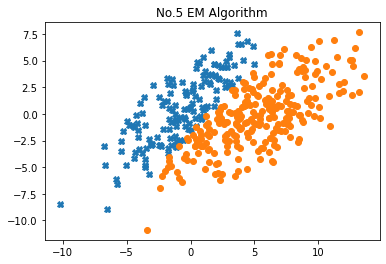

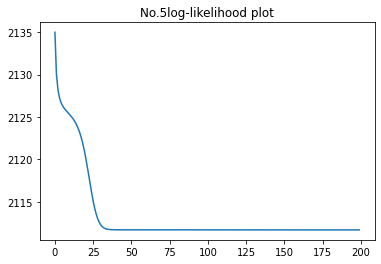

In [15]:
for i in range(5):
    print("###########################Start Experiement No.",i+1,"#######################################")
    num_samples = 400
    cov = np.array([[1., .7], [.7, 1.]]) * 10
    mean_1 = [.1, .1]
    mean_2 = [6., .1]

    x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
    x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
    xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
    xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
    data_full = np.row_stack([xy_class1, xy_class2])
    np.random.shuffle(data_full)
    data = data_full[:, :2]
    labels = data_full[:, 2]

    #print("###################plot of original data####################")
    plt.plot(x_class1[:, 0], x_class1[:, 1], 'X')  # first class, x shape
    plt.plot(x_class2[:, 0], x_class2[:, 1], 'o')  # second class, circle shape
    plt.show()

    # Run k-mean
    N, D = data.shape
    K = 2
    max_iter = 100
    class_init = np.random.binomial(1., .5, size=N)
    R = np.vstack([class_init, 1 - class_init]).T

    Mu = np.zeros([D, K])
    Mu[:, 1] = 1.
    R.T.dot(data), np.sum(R, axis=0)
    cost_plt=[]

    for it in range(max_iter):
        R = km_assignment_step(data, Mu)
        Mu = km_refitting_step(data, R, Mu)
        #print(it, cost(data, R, Mu))
        cost_plt.append(cost(data, R, Mu))

    class_1 = np.where(R[:, 0])
    class_2 = np.where(R[:, 1])

    correct_class_1 = num_samples // 2 - sum(labels[class_1])
    correct_class_2 = sum(labels[class_2])
    num_correct = correct_class_1 + correct_class_2
    print('Missclassification rate of',i, 'th K-mean clustering is ', round(1-num_correct/400,3)*100, '%')
    x_class1_new = data[class_1]
    x_class2_new = data[class_2]
    #print("##########################Plot of k-mean#################################")
    plt.plot(x_class1_new[:, 0], x_class1_new[:, 1], 'X')  # first class, x shape
    plt.plot(x_class2_new[:, 0], x_class2_new[:, 1], 'o')  # second class, circle shape
    plt.title('No.'+str(i+1)+" K-Mean Algorithm")
    plt.show()
    plt.plot(np.arange(0,max_iter,1),cost_plt)
    plt.title("No."+str(i+1)+"th cost plot")
    plt.show()

    # Run EM algorithm
    N, D = data.shape
    K = 2
    Mu = np.zeros([D, K])
    Mu[:, 1] = 1.
    Sigma = [np.eye(2), np.eye(2)]
    Pi = np.ones(K) / K
    Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities
    log_likelihood_plt = []

    max_iter  = 200

    for it in range(max_iter):
        Gamma = gm_e_step(data, Mu, Sigma, Pi)
        Mu, Sigma, Pi = gm_m_step(data, Gamma)
        # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging
        log_likelihood_plt.append(-log_likelihood(data, Mu, Sigma, Pi))

    class_1 = np.where(Gamma[:, 0] >= .5)
    class_2 = np.where(Gamma[:, 1] >= .5)

    correct_class_1 = num_samples // 2 - sum(labels[class_1])
    correct_class_2 = sum(labels[class_2])
    num_correct = correct_class_1 + correct_class_2
    print('Missclassification rate of', i,'th EM algorithm is ', round(1-num_correct/400,3)*100, '%')
    x_class1_new = data[class_1]
    x_class2_new = data[class_2]
    #print("##########################Plot of EM algorithm#################################")
    plt.plot(x_class1_new[:, 0], x_class1_new[:, 1], 'X')  # first class, x shape
    plt.plot(x_class2_new[:, 0], x_class2_new[:, 1], 'o')  # second class, circle shape
    plt.title('No.'+str(i+1)+" EM Algorithm")
    plt.show()
    plt.plot(np.arange(0,max_iter,1),log_likelihood_plt)
    plt.title('No.'+str(i+1)+"log-likelihood plot")
    plt.show()

    #print("###########################End Experiement No.",i+1,"#######################################")

### a)

Misclassification rate of clustering resulted from EM algorithm is lower than K-mean algorithm,
which means clustering performed by EM algorithm is better.

### b)

K-mean algorithm converge much faster than EM algorithm(i.e. requires less iterations to converge). K-mean go straight to converge, while EM start to converge fast,
getting flatter later, then accelerate again, but still slower than beginning. Generation of starting data affects convergence rate of EM.
EM make more assumption and trying to iterate over more hyperparameters, that could be a reason for slower convergence.(i.e. we do more computation for
better performance at the cost of speed)

### c)

Generally speacking, misclassification rate of clustering resulted from EM algorithm is lower than K-mean algorithm,
which means clustering performed by EM algorithm is better. But the exact difference between misclassifcation rates from these
two algorithm varies, which means algorithm performance depends on different realization of data. In addition, convergence rate
also varies with different realization of data, this can easily be observed on log-likelihood plot of EM algorithm.
